# Entrega laboratorio 3

## Integrantes 

- Javier Steven Barrera Toro - 202214779
- Julian Santiago Rolon Toloza - 202215839

In [172]:
from matplotlib import pyplot as plt
from typing import List, Tuple, NewType
import numpy as np
import pandas as pd
import sympy as sp

# Problema 1

En este punto se nos pide implementar el método Netwon-Raphson para encontrar los extremos locales de la función $f(x) = 3x^3 - 10x^2 - 56 x + 50$ dentro del intervalo $[-6, 6]$. La siguiente gráfica corresponde a la función de la cual se desean hallar los extremos locales. 

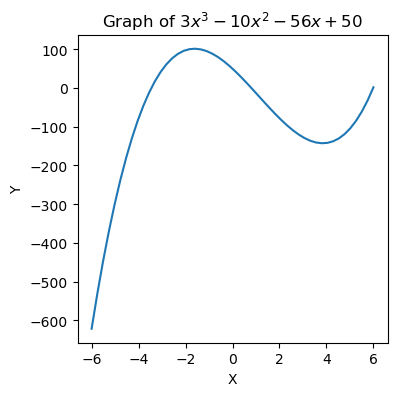

In [173]:
X = np.linspace(-6, 6, 50)
Y = 3 * X ** 3 - 10 * X ** 2 - 56 * X + 50

plt.figure(figsize=(4, 4))
plt.plot(X, Y)
plt.title('Graph of $3x^3 - 10x^2 - 56x + 50$')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Implementación del algoritmo de Newton-Raphson

La siguiente implementación calcula las derivadas y las segundas derivadas utilizando Sympy, lo cual facilita la definición de la misma función. 

In [174]:
def newton_raphson(initial_guess: int, tolerance: float, N_max: int, alpha: float, function) -> Tuple[float, int]:
    """Function to execute the 1D Newton-Raphson method given a function in Sympy format.

    Args:
        initial_guess (int): The initial guess for the minimum value of the function.
        tolerance (float): The tolerance for the minimum value of the function.
        N_max (int): The maximum number of iterations to be executed.
        alpha (float): The alpha value for the Newton-Raphson method.
        function (): The function to be minimized in Sympy format.

    Returns:
        Tuple[float, int]: The minimum value of the function.
    """
    k = 0
    x = [initial_guess]

    derivative = sp.lambdify('x', sp.diff(function, 'x'), 'numpy')
    double_derivative = sp.lambdify('x', sp.diff(sp.diff(function), 'x'), 'numpy')

    while k < N_max:
        f_prime_val = derivative(x[k])
        if abs(f_prime_val) < tolerance:
            break
        
        f_double_prime_val = double_derivative(x[k])
        if f_double_prime_val == 0:
            raise ValueError("The second derivative is zero.")

        d_k = - alpha * f_prime_val / f_double_prime_val
        
        x.append(x[k] + d_k)
        k += 1
    
    return x[-1], k

In [175]:
function = sp.simplify('3*x**3 - 10*x**2 - 56*x + 50')
function

3*x**3 - 10*x**2 - 56*x + 50

## Calculo análitico de las derivadas de $f(x)$

Calculemos las derivadas de manera análitica para el método de 1 dimensión. Dada $f(x) = 3x^3 - 10x^2 - 56 x + 50$, la derivada $f'(x)$ es:
$$
9x^2 - 20x - 56
$$

Asimismo, la segunda derivada $f^{(2)}(x)$ de la función corresponde a:
$$
18x - 20
$$

## Diferentes valores iniciales $x_0$

En el siguiente código se puede observar que para distintos valores iniciales se llegan a dos puntos extremos, aproximadamente $1.61$ y $3.84$. 

In [176]:
x_0 = np.arange(-6, 7, 1)
mins = [newton_raphson(x, 1e-8, 100, 0.05, function)[0] for x in x_0]
mins = list(map(lambda x: round(x, 2), mins))
mins

[np.float64(-1.67),
 np.float64(-1.65),
 np.float64(-1.64),
 np.float64(-1.63),
 np.float64(-1.62),
 np.float64(-1.62),
 np.float64(-1.61),
 np.float64(-1.61),
 np.float64(3.83),
 np.float64(3.84),
 np.float64(3.84),
 np.float64(3.85),
 np.float64(3.86)]

Esto se verifica en la siguiente gráfica, en el cual para valores enteros de -6 a 6 obtenemos que se llegan a estos puntos extremos. 

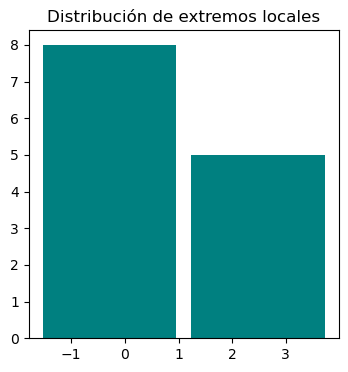

In [177]:
plt.figure(figsize=(4,4))
plt.title('Distribución de extremos locales')
plt.hist(mins, bins=2, rwidth=0.9, color='teal')
plt.show()

## Diferentes valores iniciales de $\alpha$

Para probar como varia el proceso de optimización en base al factor de paso $\alpha$ se van a utilizar diferentes valores del mismo y luego se revisará cuantos pasos y si se converge a un mismo valor. Como se puede ver en la siguiente celda de código se coverge al mismo valor $-1.6$. Además se puede observar que para distintos factores de paso se llega al mismo punto, la diferencia significativa esta en la cantidad de pasos necesarios para llegar a la solución. Para un factor de paso de 0.01 se utilizan 1969 pasos y para un factor de 1.02 se utilizan unicamente 6 pasos, ambos llegando a la misma solución.

In [178]:
alphas = np.linspace(0.01, 1.3, 15)

mins = [newton_raphson(-6, 1e-6, 2000, alpha, function)[0] for alpha in alphas]
steps = [newton_raphson(-6, 1e-6, 2000, alpha, function)[1] for alpha in alphas]

pd.DataFrame({
    'Alfa': list(map(lambda x: round(float(x), 2), alphas)),
    'Min. val': list(map(lambda x: round(float(x), 1), mins)),
    'Pasos': steps
})

,Alfa,Min. val,Pasos
0,0.01,-1.6,1969
1,0.10,-1.6,185
2,0.19,-1.6,93
3,0.29,-1.6,60
4,0.38,-1.6,43
5,0.47,-1.6,32
6,0.56,-1.6,25
7,0.66,-1.6,20
8,0.75,-1.6,16
9,0.84,-1.6,12


## Gráfica con los puntos encontrados

En la siguiente gráfica se pueden observar los extremos locales hallados para diferentes puntos iniciales. En esta gráfica se puede observar que se convergen a los dos puntos antes mencionados. 

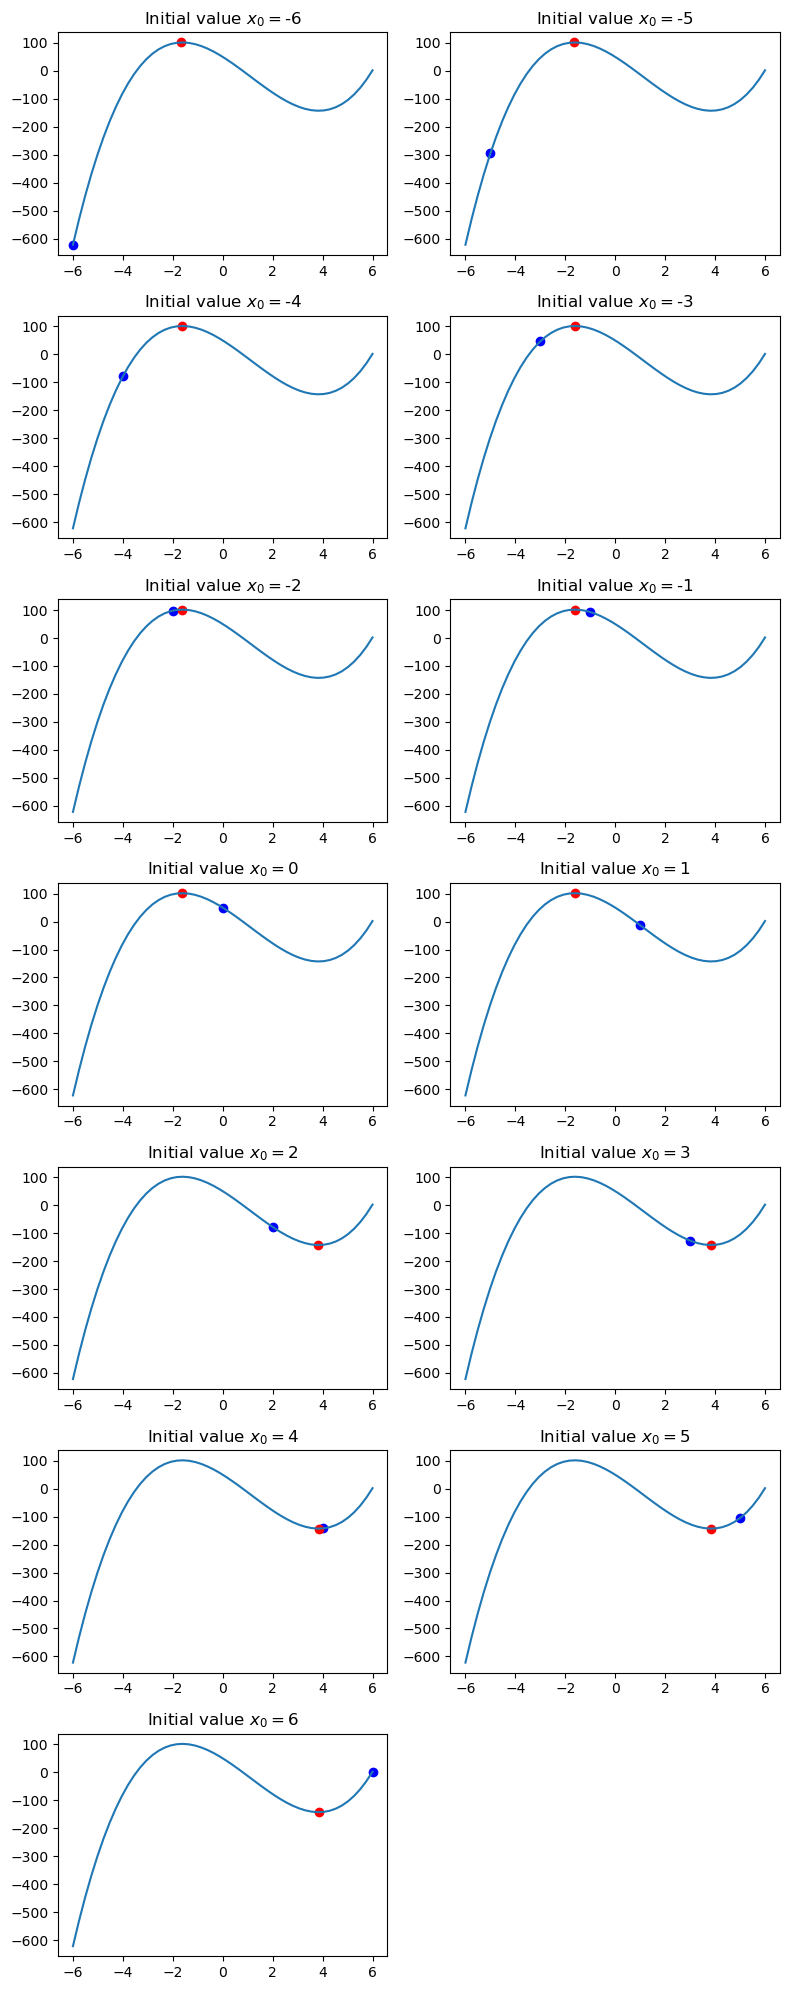

In [179]:
X = np.linspace(-6, 6, 50)
Y = 3 * X ** 3 - 10 * X ** 2 - 56 * X + 50

plt.figure(figsize=(8,20), tight_layout=True)

for i, x in enumerate(x_0):
    x_min = newton_raphson(x, 1e-6, 100, 0.05, function)[0]

    plt.subplot(7, 2, i + 1)
    plt.plot(X, Y)
    plt.scatter(x, 3 * x ** 3 - 10 * x ** 2 - 56 * x + 50, color='blue')
    plt.scatter(x_min, 3 * x_min ** 3 - 10 * x_min ** 2 - 56 * x_min + 50, color='red')
    plt.title(f'Initial value $x_0 = ${x}')

## Análisis del comportamiento de convergencia

**TODO**

# Problema 2

En este punto se nos pide implementar el método Netwon-Raphson para encontrar los extremos locales de la función $f(x) = x^5 - 8x^3 + 10x +6$ dentro del intervalo $[-3, 3]$. La siguiente gráfica corresponde a la función de la cual se desean hallar los extremos locales.

In [180]:
function = sp.simplify('x**5 - 8*x**3 + 10 * x + 6')
function

x**5 - 8*x**3 + 10*x + 6

La gráfica de la función a la cual se le quieren hallar los extremos locales es la siguiente.

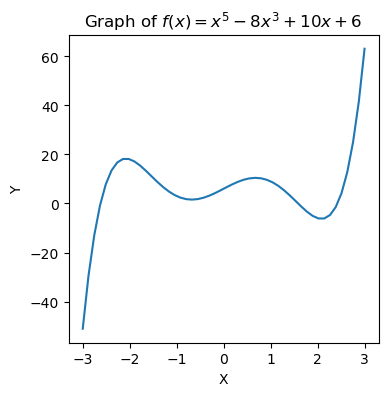

In [181]:
X = np.linspace(-3, 3, 50)
Y = X ** 5 - 8 * X ** 3 + 10 * X + 6

plt.figure(figsize=(4,4))
plt.plot(X, Y)
plt.title("Graph of $f(x) = x^5 - 8 x^3 + 10 x + 6$")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Derivadas de $f(x)$

Dado que $f(x) = x^5 - 8x^3 + 10 x + 6$ la primera derivada de la función se presenta a continuación:
$$
f'(x) = 5x^4 - 24 x^2 + 10
$$

Asimismo, la segunda derivada de la función es:
$$
f^{(2)}(x) = 20x^3 - 48x
$$

Me aburri y pase al 3, suerte Julian.

# Problema 3

## Parte a: Función de Rosenbrock (3D)

En este punto se nos pide aplicar el método de Newton-Raphson para encontrar el mínimo de la función de Rosenbrock, es $f(x,y) = (x-1)^2 + 100(y - x^2)^2$.

### Gradiente y Hessiana de $f(x,y)$

En cuanto al gradiente y la matriz Hessiana corresponden a los siguientes. El gradiente se calcula como el vector de derivadas parciales respecto a cada una de las variables independientes de la función. Es decir, un vector columna cuya primera entrada será la derivada parcial de la función respecto a $x$ y la segunda entrada será la derivada parcial de la función respecto a $y$.

$$
\nabla f(x,y) =
\begin{pmatrix}
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y}
\end{pmatrix}
=\begin{pmatrix}
    2(x-1) - 400x (y - x^2) \\
    200 (y - x^2)
\end{pmatrix}
$$

Mientras que la matriz hessiana es una matriz de segundas derivadas de la siguiente manera.
$$
H(f(x,y)) = \begin{pmatrix}
f_{xx} & f_{xy} \\
f_{yx} & f_{yy}
\end{pmatrix}
$$

Teniendo en cuenta esta definición para la matriz hessiana, la matriz correspondiente para la función $f(x,y)$ es la siguiente.
$$
H(f(x,y)) = \begin{pmatrix}
2 - 400y + 1200x^2 & -400x \\
-400x & 200
\end{pmatrix}
$$

### Newton-Raphson para funciones bidimensionales

En las siguientes celdas de código se define un nuevo tipo de dato para agregar el tipado a la función y la función de `newton_raphson` para dos dimensiones. El nuevo tipo se definió ya que quería compactar la definición misma de la función. Por otro lado, para la función que implementa el método de Newton-Raphson para funciones bidimensionales se opto por realizar una modificación a la función anteriormente planteada. La función retorna el punto optimo, el número de pasos que se realizaron y los puntos por los cuales paso el algoritmo para llegar al punto optimo.

In [182]:
NewtonRaphson2DTuple = NewType(
    'NewtonRaphson2DTuple',
    Tuple[float, int, List[Tuple[float, float]]]
)

In [183]:
def newton_raphson2D(initial_guess: int, tolerance: float, N_max: int, alpha: float, function, variables) -> NewtonRaphson2DTuple:
    """Function to execute the 2D Newton-Raphson method given a function and its derivative.

    Args:
        initial_guess (int): The initial guess for the minimum value of the function.
        tolerance (float): The tolerance for the minimum value of the function.
        N_max (int): The maximum number of iterations to be executed.
        alpha (float): The alpha value for the Newton-Raphson method.
        function (): The function to be minimized in Sympy format.
        variables (List[str]): List of variables used in the function.

    Returns:
        NewtonRaphson2DTuple: A tuple containing three values:
            the optimal point, the number of steps, and the sequence of steps.
    """
    # validations
    if len(variables) < 2:
        raise ValueError("The function need two variables")
    if len(initial_guess) != len(variables):
        raise ValueError("The number of entries in initial guess vector need to be equal to variables lenght")
    
    k = 0
    x = [np.array(initial_guess)]

    # symbolic gradient
    sym_gradient = sp.Matrix([function]).jacobian(variables)
    # symbolic hessian
    sym_hessian = sp.hessian(function, variables)

    while k < N_max:
        gradient = sp.lambdify(variables, sym_gradient, 'numpy')
        hessian = sp.lambdify(variables, sym_hessian, 'numpy')
        
        gradient_val = gradient(*x[k])
        if np.linalg.norm(gradient_val) < tolerance:
            break

        hessian_val = hessian(*x[k])
        if np.linalg.det(hessian_val) == 0:
            raise ValueError("The matrix has 0 determinant")

        d_k = - alpha * np.linalg.inv(hessian_val) @ gradient_val.T
        x.append(x[k] + d_k.flatten())
        k += 1
    
    return x[-1], k, x

### Punto inicial $(x_0, y_0) = (0, 10)$

Primero se define la función utilizando Sympy y luego se realiza la optimización con los parámetros que se observan en la celda correspondiente. 

In [184]:
function = sp.simplify("(x-1)**2 + 100*(y - x**2)**2")
function

(x - 1)**2 + 100*(x**2 - y)**2

In [185]:
x0 = [0, 10]
minimum, n_steps, steps = newton_raphson2D(x0, 1e-10, 300, 0.95, function, ['x', 'y'])

De la siguiente celda de código se puede observar que el número de pasos que se llevaron a cabo son 22 y el punto optimo que alcanzo el algoritmo fue $(1,1)$. Luego de probar con diferentes hiperparámetros, se llego a la conclusión que el número de pasos se modula con el factor de paso $\alpha$ y la precisión del punto optimo se puede modular con el nivel de tolerancia.

In [186]:
n_steps, minimum

(22, array([1., 1.]))

### Superficie $z = f(x,y)$ en 3D

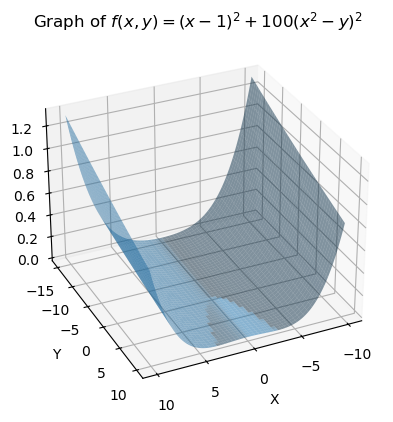

In [187]:
x = np.linspace(-10, 10, 500)
y = np.linspace(-15, 10, 500)

X, Y = np.meshgrid(x, y)
lambda_f = sp.lambdify(['x','y'], function, 'numpy')

Z = (X - 1)**2 + 100 * (Y - X**2)**2

ax = plt.axes(projection='3d')
ax.view_init(elev=30, azim=65)
ax.plot_surface(X, Y, Z, alpha=0.5, shade=True)

ax.set(
    xlabel='X',
    ylabel='Y',
    zlabel='Z',
    title='Graph of $f(x,y) = (x-1)^2 + 100(x^2 - y)^2$'
)
plt.show()

### Puntos sobre la superficie

Luego de probar diferentes configuraciones sobre la orientación de la gráfica se obtuvo la que se observa en la siguiente celda. En esta se puede ver claramente el recorrido que hizo este algoritmo para hallar el punto optimo. El punto en verde es el punto de partida y el punto rojo es el punto final que logro obtener el método de Newton-Raphson.

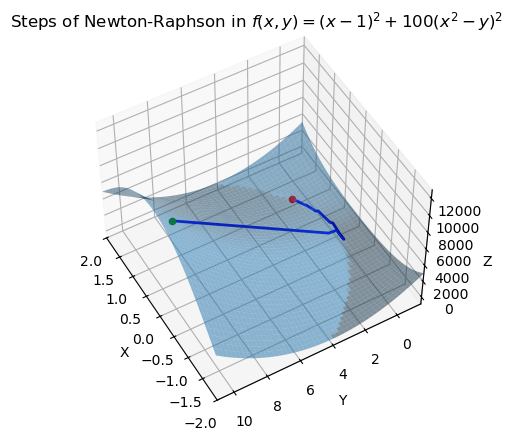

In [188]:
x = np.linspace(-2, 2, 200)
y = np.linspace(-1.5, 11, 200)

X, Y = np.meshgrid(x, y)
lambda_f = sp.lambdify(['x','y'], function, 'numpy')

Z = (X - 1)**2 + 100 * (Y - X**2)**2

ax = plt.axes(projection='3d')
ax.view_init(elev=50, azim=150)
ax.plot_surface(X, Y, Z, alpha=0.5, shade=True)

x_points = [x[0] for x in steps]
y_points = [x[1] for x in steps]
z_points = [lambda_f(*list(x)) for x in steps]

ax.plot(x_points[:-2], y_points[:-2], z_points[:-2], color='blue', linewidth=2)
ax.scatter(x_points[-2:-1], y_points[-2:-1], y_points[-2:-1], color='red')
ax.scatter([0], [10], [lambda_f(0, 10)], color='green')

ax.set(
    xlabel='X',
    ylabel='Y',
    zlabel='Z',
    title='Steps of Newton-Raphson in $f(x,y) = (x-1)^2 + 100(x^2 - y)^2$',
    xlim=(-2,2),
    ylim=(-1.5,11)
)
plt.show()

### Convergencia hacia el mínimo conocido

Se sabe que el mínimo conocido de la función es $(1,1)$ y según el resultado obtenido en el punto anterior se puede concluir que efectivamente se llego al punto óptimo. (**TODO**)

## Parte b: Función en 4D

Para este problema, decidimos utilizar la función objetivo de regresión lineal con dos variables explicativas ($x_{1k}$ y $x_{2k}$ para un $k \in \{1, 2, \dots, n\}$) dada por:

$$
f(w_1, w_2, b) = \frac{1}{n}\sum_{i = 1}^{n} (y_i - (w_1 x_{1i} + w_2 x_{2i} + b)) ^2
$$

Para esto es necesario un conjunto de datos, por lo tanto, se opta por generar un conjunto de datos de manera aleatoria en la siguiente celda para hallar el optimo global de esta función.

In [189]:
import pandas as pd

np.random.seed(42)
n = 580

x1 = np.random.uniform(0, 1, n)
x2 = np.random.uniform(0, 1, n)
b = np.random.uniform(0, 1, n)

y = 23.45 * x1 - 12.23 * x2 + b
y_trans = (y - np.min(y))/(np.max(y) - np.min(y))

df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y_trans})

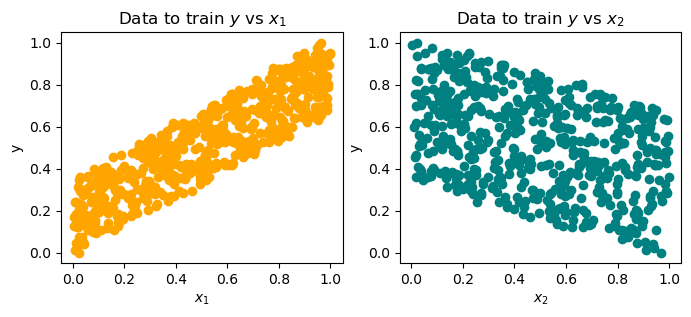

In [190]:
fig, axis = plt.subplots(1,2, figsize=(8,3))

axis[0].set(title='Data to train $y$ vs $x_1$', xlabel='$x_1$', ylabel='y')
axis[1].set(title='Data to train $y$ vs $x_2$', xlabel='$x_2$', ylabel='y')

axis[0].scatter(x1, y_trans, color='orange')
axis[1].scatter(x2, y_trans, color='teal')

plt.show()

## Formulación del algoritmo de Newton-Raphson en $\mathbb{R}^4$

Se quiere minimizar $f(x,y,z)$. Para lo cual se usa la expansión de Taylor de segundo orden $\nabla f(x) \approx \nabla f(x_0) + H(x_0)(x - x_0)$ en el cual $\nabla f(x)$ es el gradiante y $H(x)$ es la matriz Hessiana. De igual manera, la actualización que se debe llevar a cabo es $x_{k +1} = x_k - H(x_k)^{-1} \nabla f(x_k)$. 

El pseudocódigo es el siguiente:

Entrada:  
- Tolerancia $ \epsilon $
- Máximo de iteraciones
- Factor de paso $\alpha$
- Valor inicial $(x_0, y_0, z_0)$

1. Inicializar $i = 1$
2. Mientras $ ||\nabla f(x,y,z)|| > \epsilon $ y no se excedan el número de iteraciones:

    1. Calcular el gradiente $ \nabla f(x,y,z) $
    2. Calcular la Hessiana (esta es la misma para todo el proceso de optimización en regresión lineal) $ H(x,y,z) $
    3. Resolver y actualizar: $x_{i+1} = x_{i} -  H^{-1}(f(w_1, w_2, b) \nabla f(w_1, w_2, b)$
    4. Actualizar $i = i + 1$

4. Retornar el último punto optimo


## Definición del criterio de parada basado en la norma del gradiente

El criterio de parada basado en la norma del gradiente sería que este valor no exceda el valor de tolerancia definida en los parámetros de la función. Es un poco redundante, pero se usará la norma $L_2$ para definir este factor de parada, tal y como se define en la siguiente formula.

$$
|| \nabla f(x,y,z) || = \sqrt{f_{w_1}^2 + f_{w_2}^2 + f_{b}^2 } > \epsilon
$$

Además, se utilizará como criterio de parada que no se exceda de un límite máximo de iteraciones, en dado caso que el algoritmo no sea capaz de converger a un punto optimo. 

## Calculo analitico del gradiente y la matriz Hessiana de la función propuesta

Dado que $f(w_1, w_2, b)$ para obtener el gradiente se realizan las derivadas parciales respecto a cada una de las variables independientes.

$$
\nabla f(w_1, w_2, b) =
\begin{pmatrix}
\frac{\partial f}{\partial w_1} \\
\frac{\partial f}{\partial w_2} \\
\frac{\partial f}{\partial b}
\end{pmatrix}
=\begin{pmatrix}
    -\frac{2}{n} \sum_{i = 1}^n x_{1i} ( y_i - (w_1 x_{1i} + w_2 x_{2i} + b)) \\
    -\frac{2}{n} \sum_{i = 1}^n x_{2i} ( y_i - (w_1 x_{1i} + w_2 x_{2i} + b)) \\
    -\frac{2}{n} \sum_{i = 1}^n ( y_i - (w_1 x_{1i} + w_2 x_{2i} + b))
\end{pmatrix}
$$

Asimismo, la matriz hessiana con las derivadas parciales es la siguiente.

$$
H(f(w_1,w_2,b)) = \begin{pmatrix}
f_{w_1 w_1} & f_{w_1 w_2} & f_{w_1 b} \\
f_{w_2 w_1} & f_{w_2 w_2} & f_{w_2 b} \\
f_{b w_1} & f_{b w_2} & f_{b b} 
\end{pmatrix} = \begin{pmatrix}
\frac{2}{n} \sum_{i=1}^{n} x_{1i} ^2 & \frac{2}{n} \sum_{i=1}^n x_{1i} x_{2i} & \frac{2}{n}\sum_{i = 1}^{n}  x_{1i} \\
\frac{2}{n} \sum_{i=1}^n x_{1i} x_{2i} & \frac{2}{n} \sum_{i = 1}^n x_{2i} ^2 & \frac{2}{n} \sum_{i = 1}^n x_{2i} \\
\frac{2}{n}\sum_{i = 1}^{n}  x_{1i} & \frac{2}{n} \sum_{i = 1}^n x_{2i} & \frac{2}{n} \sum_{i = 1}^{n} 1
\end{pmatrix}
$$

## Implementación del método iterativo para funciones tetradimensionales

Una implementación que funciona también para funciones tetradimensionales es la que se definió anteriormente (`newton_raphson2D`), debido a que se definió de manera general utilizando la libreria `Sympy` que calcula las derivadas de manera automatica. Además, es necesario mencionar que la siguiente función es muy especifica ya que se tiene que calcular en base a los datos. Es necesario mencionar que la Hessiana no cambia de iteración en iteración ya que como se ve en el punto anterior esta depende únicamente de los datos. 

In [191]:
def newton_raphson4D_linear_regression(initial_guess: List[int], tolerance: float, N_max: int, alpha: float, data: pd.DataFrame) -> NewtonRaphson2DTuple:
    """Function to execute the 4D Newton-Raphson to minimize the linear regression equation.

    Args:
        initial_guess (int): The initial guess for the minimum value of the function.
        tolerance (float): The tolerance for the minimum value of the function.
        N_max (int): The maximum number of iterations to be executed.
        alpha (float): The alpha value for the Newton-Raphson method.
        data (pd.DataFrame): DataFrame with the data for training.
        
    Returns:
        NewtonRaphson2DTuple: A tuple containing three values:
            the optimal point, the number of steps, and the sequence of steps.
    """
    # validations
    k = 0
    x = [np.array(initial_guess)]
    
    x1 = data['x1']
    x2 = data['x2']

    n = x1.shape[0]

    hessian = np.array([
        [2 * np.sum(x1 ** 2) / n, 2 * np.sum(x1 * x2) / n, 2 * np.sum(x1) / n],
        [2 * np.sum(x1 * x2) / n, 2 * np.sum(x2 **2) / n, 2 * np.sum(x2) / n],
        [2 * np.sum(x1) / n, 2 * np.sum(x2) / n, 2]
    ])

    if np.linalg.det(hessian) == 0:
        raise ValueError("The matrix has 0 determinant")

    while k < N_max:
        w1, w2, b = x[k]

        gradient = np.array([
            -2 * np.sum(x1 * (y - (w1 * x1 + w2 * x2 + b))) / n,
            -2 * np.sum(x2 * (y - (w1 * x1 + w2 * x2 + b))) / n,
            -2 * np.sum(y - (w1 * x1 + w2 * x2 + b)) / n,
        ])

        if np.linalg.norm(gradient) < tolerance:
            break

        d_k = - alpha * np.linalg.inv(hessian) @ gradient
        x.append(x[k] + d_k)
        k += 1
    
    return x[-1], k, x

En la siguiente celda de código se puede ver la ejecución de la función que utiliza Newton-Raphson para hallar los minimos de la función objetivo para el problema de regresión lineal múltiple. Se puede notar que partiendo desde el punto $(0, 0, 0)$ y definiendo los parámetros del algoritmo se obtienen los mejores valores en tan solo 12 pasos. Algo a tener en cuenta es que los puntos optimos son $w_1 = 23.40$ y $w_2 =-12.25$, que son los mismos que se habían definido inicialmente para generar los datos aleatorios, por lo tanto, se puede ver que el resultado del proceso realizado para hallar el punto optimo es el adecuado.

In [192]:
x0 = [1, 1, 1]
minimum, n_steps, steps = newton_raphson4D_linear_regression(
    x0,
    tolerance=1e-10,
    N_max=100,
    alpha=0.95,
    data=df
)

In [193]:
n_steps, minimum

(9, array([ 23.40489699, -12.25952924,   0.53650862]))

Otra manera de revisar que tan bien se ajusta el optimo al modelo es realizar la gráfica en 3D y observar el plano que se quiere estimar y el que se obtiene mediante el proceso de optimización. Una vez se realiza este proceso se llega a la conclusión que los parámetros del plano se aproximan bastante bien debido a que se puede ver como los dos planos se sobrelapan.  

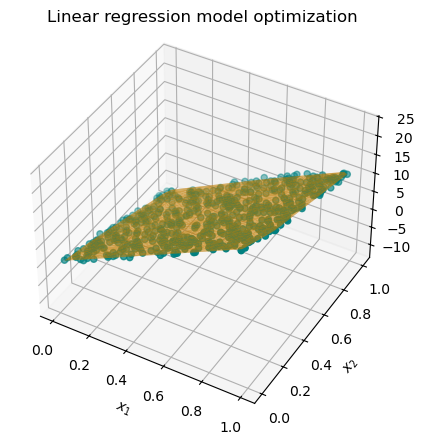

In [194]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y, color='teal')
ax.plot_trisurf(
    x1, x2, minimum[0] * x1 + minimum[1] * x2 + minimum[2],
    color='orange',
    alpha=0.7
)
ax.view_init(elev=40)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.set_title('Linear regression model optimization')
plt.show()

## Discusión de las dificultades computacionales específicas del problema

**TODO**

# Problema 4

# Problema 5